<a href="https://colab.research.google.com/github/guebin/MP2024/blob/main/quiz/Quiz-7.ipynb"><img src="https://colab.research.google.com/assets/colab-badge.svg" style="text-align: left"></a>

| **항목**               | **허용 여부**        | **비고**                                          |
|------------------------|----------------------|---------------------------------------------------|
| **강의노트 참고**      | 허용                 | 수업 중 제공된 강의노트나 본인이 정리한 자료를 참고 가능       |
| **구글 검색**          | 허용                 | 인터넷을 통한 자료 검색 및 정보 확인 가능        |
| **생성 모형 사용**           | 허용 안함            | 인공지능 기반 도구(GPT 등) 사용 불가            |

In [3]:
import transformers
import datasets
#---#
import numpy as np
import pandas as pd 
import matplotlib as mpl
import matplotlib.pyplot as plt
import torch
import torchvision

/home/cgb3/anaconda3/envs/hf/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


# 1. `model`

`(1)` 아래의 자료를 관찰하라. 

In [13]:
d = datasets.load_dataset("food101", split="train[:8]")
_transforms = torchvision.transforms.Compose([
    torchvision.transforms.Resize((224,224)), 
    torchvision.transforms.ToTensor(), 
])
def transforms(examples):
    examples["pixel_values"] = [_transforms(img) for img in examples["image"]]
    del examples["image"]
    return examples
d = d.with_transform(transforms)[:8]
d

{'label': [6, 6, 6, 6, 6, 6, 6, 6],
 'pixel_values': [tensor([[[0.1216, 0.1176, 0.1176,  ..., 0.0039, 0.0039, 0.0000],
           [0.1333, 0.1294, 0.1255,  ..., 0.0039, 0.0039, 0.0039],
           [0.1451, 0.1373, 0.1333,  ..., 0.0039, 0.0039, 0.0000],
           ...,
           [0.2235, 0.2157, 0.2471,  ..., 0.3569, 0.3725, 0.3529],
           [0.2627, 0.2588, 0.2314,  ..., 0.3490, 0.3608, 0.3608],
           [0.2431, 0.2627, 0.2549,  ..., 0.3373, 0.3412, 0.3373]],
  
          [[0.1373, 0.1333, 0.1333,  ..., 0.1059, 0.1020, 0.0980],
           [0.1490, 0.1451, 0.1412,  ..., 0.1020, 0.0980, 0.0941],
           [0.1608, 0.1529, 0.1490,  ..., 0.1020, 0.0902, 0.0863],
           ...,
           [0.2157, 0.2078, 0.2431,  ..., 0.3294, 0.3451, 0.3373],
           [0.2510, 0.2471, 0.2235,  ..., 0.3216, 0.3451, 0.3529],
           [0.2314, 0.2510, 0.2431,  ..., 0.3098, 0.3294, 0.3333]],
  
          [[0.1412, 0.1412, 0.1451,  ..., 0.0941, 0.0902, 0.0863],
           [0.1569, 0.1569, 0.1529,  

`d`를 아래 `model`의 입력으로 사용하여 loss를 계산하라. 

In [24]:
model = transformers.AutoModelForImageClassification.from_pretrained(
    "google/vit-base-patch16-224-in21k",
    num_labels=101,
)

Some weights of ViTForImageClassification were not initialized from the model checkpoint at google/vit-base-patch16-224-in21k and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


`(풀이)`

`(2)` 아래의 자료를 관찰하라. 

In [36]:
d = datasets.load_dataset("food101", split="train[:1]")
_transforms = torchvision.transforms.Compose([
    torchvision.transforms.Resize((224,224)), 
    torchvision.transforms.ToTensor(), 
])
def transforms(examples):
    examples["pixel_values"] = [_transforms(img) for img in examples["image"]]
    del examples["image"]
    return examples
d = d.with_transform(transforms)[0]
d

{'label': 6,
 'pixel_values': tensor([[[0.1216, 0.1176, 0.1176,  ..., 0.0039, 0.0039, 0.0000],
          [0.1333, 0.1294, 0.1255,  ..., 0.0039, 0.0039, 0.0039],
          [0.1451, 0.1373, 0.1333,  ..., 0.0039, 0.0039, 0.0000],
          ...,
          [0.2235, 0.2157, 0.2471,  ..., 0.3569, 0.3725, 0.3529],
          [0.2627, 0.2588, 0.2314,  ..., 0.3490, 0.3608, 0.3608],
          [0.2431, 0.2627, 0.2549,  ..., 0.3373, 0.3412, 0.3373]],
 
         [[0.1373, 0.1333, 0.1333,  ..., 0.1059, 0.1020, 0.0980],
          [0.1490, 0.1451, 0.1412,  ..., 0.1020, 0.0980, 0.0941],
          [0.1608, 0.1529, 0.1490,  ..., 0.1020, 0.0902, 0.0863],
          ...,
          [0.2157, 0.2078, 0.2431,  ..., 0.3294, 0.3451, 0.3373],
          [0.2510, 0.2471, 0.2235,  ..., 0.3216, 0.3451, 0.3529],
          [0.2314, 0.2510, 0.2431,  ..., 0.3098, 0.3294, 0.3333]],
 
         [[0.1412, 0.1412, 0.1451,  ..., 0.0941, 0.0902, 0.0863],
          [0.1569, 0.1569, 0.1529,  ..., 0.0902, 0.0863, 0.0824],
          [

`d`를 아래 `model`의 입력으로 사용하여 loss를 계산하라. 

In [39]:
model = transformers.AutoModelForImageClassification.from_pretrained(
    "google/vit-base-patch16-224-in21k",
    num_labels=101,
)

Some weights of ViTForImageClassification were not initialized from the model checkpoint at google/vit-base-patch16-224-in21k and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


`(풀이)`

`(3)` 아래의 자료 `image1` `image2`를 관찰하라. 

In [43]:
from PIL import Image
import requests
from io import BytesIO

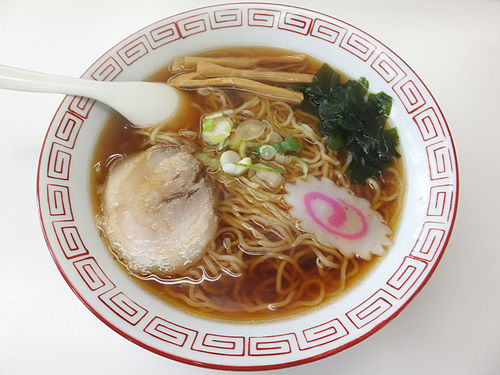

In [44]:
url = "https://upload.wikimedia.org/wikipedia/commons/thumb/e/ec/Shoyu_ramen%2C_at_Kasukabe_Station_%282014.05.05%29_1.jpg/500px-Shoyu_ramen%2C_at_Kasukabe_Station_%282014.05.05%29_1.jpg"
response = requests.get(url)
image1 = Image.open(BytesIO(response.content))
image1

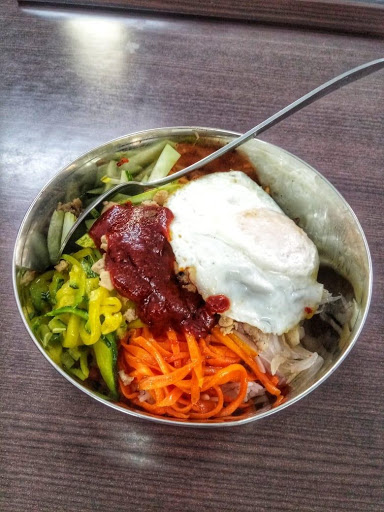

In [45]:
url = "https://upload.wikimedia.org/wikipedia/commons/f/f9/Bibimbap_made_by_Mrs._Jang.jpg"
response = requests.get(url)
image2 = Image.open(BytesIO(response.content))
image2

 `image1`, `image2` 를 적당히 변환하여 `(2,3,224,224)` 의 tensor로 만든뒤 아래의 모형의 입력으로 사용하라. 

In [46]:
config = transformers.AutoConfig.from_pretrained("google/vit-base-patch16-224-in21k")
config.image_size = 224
config.num_labels = 101
model = transformers.AutoModelForImageClassification.from_pretrained(
    "google/vit-base-patch16-224-in21k",
    config=config,
    
)

Some weights of ViTForImageClassification were not initialized from the model checkpoint at google/vit-base-patch16-224-in21k and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


**Notes**

1. 정규화를 생략하고 텐서 변환과 리사이즈 정도의 변환만 수행해도 정답으로 인정함.
2. 라벨은 모델에 전달하지 않아도 무방함. 즉 loss는 계산하지 않아도 무방함.

`(풀이)`

In [ ]:
# 정답예시

ImageClassifierOutput(loss=None, logits=tensor([[ 1.5910e-01, -1.4594e-01,  4.9138e-03, -5.2517e-02,  2.4854e-02,
         -1.3903e-01, -2.4015e-01, -2.8261e-02, -9.3792e-02,  1.2963e-01,
          8.9284e-02, -1.5406e-02, -1.3241e-01,  8.9948e-02, -1.0548e-01,
          6.1947e-02, -2.4594e-02, -8.0227e-02, -3.3625e-02,  3.5066e-03,
          9.7704e-02,  2.3860e-01, -4.3739e-03, -3.0137e-02,  4.2266e-02,
         -1.4837e-01,  1.1329e-01, -1.1228e-01,  1.9033e-01, -1.2295e-01,
          6.6984e-02, -1.9205e-01,  5.4454e-02, -9.0645e-02, -4.5244e-02,
         -2.1150e-01, -1.2079e-01,  6.9509e-02,  5.6514e-02,  1.7015e-02,
         -1.4428e-01, -1.3825e-01, -1.4087e-01,  2.2659e-02,  1.7281e-01,
          1.6326e-01, -2.6725e-02,  1.7449e-01,  1.3258e-01,  3.2643e-02,
         -1.5911e-01, -4.7271e-02, -1.8954e-01, -6.0843e-02,  1.6580e-02,
         -1.4522e-01,  9.3828e-02, -8.0814e-02, -3.8185e-02, -2.9299e-02,
         -1.2740e-01,  6.4100e-02, -2.2676e-01, -1.1965e-01,  1.0947e-02

`(4)` (3)에서의 `image1`, `image2` 를 적당히 변환하여 `(2,3,?,?)` 의 tensor로 만든뒤 아래의 모형의 입력으로 사용하라. 

In [55]:
config = transformers.AutoConfig.from_pretrained("google/vit-base-patch16-224-in21k")
config.image_size = 64
config.num_labels = 101
model = transformers.AutoModelForImageClassification.from_pretrained(
    "google/vit-base-patch16-224-in21k",
    config = config,
    ignore_mismatched_sizes = True
)

Some weights of ViTForImageClassification were not initialized from the model checkpoint at google/vit-base-patch16-224-in21k and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
Some weights of ViTForImageClassification were not initialized from the model checkpoint at google/vit-base-patch16-224-in21k and are newly initialized because the shapes did not match:
- embeddings.position_embeddings: found shape torch.Size([1, 197, 768]) in the checkpoint and torch.Size([1, 17, 768]) in the model instantiated
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


**Notes**

1. 정규화를 생략하고 텐서 변환과 리사이즈 정도의 변환만 수행해도 정답으로 인정함.
2. 라벨은 모델에 전달하지 않아도 무방함. 즉 loss는 계산하지 않아도 무방함.

`(풀이)`

In [ ]:
# 정답예시

ImageClassifierOutput(loss=None, logits=tensor([[ 0.2618, -0.0320, -0.0116,  0.0071,  0.0519,  0.0716, -0.1350, -0.0260,
         -0.0476, -0.0639,  0.0088, -0.0169, -0.0928,  0.1130, -0.0348,  0.0373,
         -0.1701,  0.0723, -0.1532,  0.0575, -0.0596, -0.0042,  0.1069, -0.0413,
          0.0638, -0.0998, -0.1197, -0.1078,  0.0019, -0.1990, -0.0330,  0.0376,
         -0.1994,  0.0226, -0.0663,  0.0653, -0.1168,  0.1237,  0.0504,  0.0284,
         -0.1132, -0.1275, -0.0925, -0.0011,  0.0159,  0.0045,  0.0434, -0.0046,
          0.0486, -0.0997,  0.0237,  0.0342,  0.0490, -0.0025, -0.1499, -0.0232,
          0.0849,  0.0063,  0.1512, -0.0171, -0.0396, -0.1087,  0.1271, -0.0251,
          0.0176, -0.0308, -0.0886,  0.0185, -0.0074,  0.0104, -0.0942,  0.0352,
         -0.0843,  0.1659, -0.0103,  0.1084, -0.0151,  0.0113,  0.0102, -0.1172,
         -0.0010, -0.1417,  0.0928, -0.0511,  0.0657, -0.0097, -0.1294, -0.0322,
         -0.0300,  0.0032, -0.0816,  0.0848, -0.0711,  0.0208,  0.048

`(5)` 아래의 자료를 관찰하라. 

In [91]:
df = pd.read_csv("https://raw.githubusercontent.com/guebin/MP2024/refs/heads/main/posts/mbti_1.csv")
mbti = datasets.Dataset.from_pandas(df)

In [92]:
def transform(example):
    result = dict()
    if "E" in example['type']:
        result['labels'] = 1 
    else: 
        result['labels'] = 0 
    del example['type']
    return result
    
mbti = mbti.map(transform)

Map: 100%|██████████| 8675/8675 [00:00<00:00, 40162.69 examples/s]


In [93]:
d = mbti.select(range(10))
d

Dataset({
    features: ['posts', 'labels'],
    num_rows: 10
})

`d`를 아래 `model`의 입력으로 사용하여 loss를 계산하라. 

In [94]:
model = transformers.AutoModelForSequenceClassification.from_pretrained(
    "distilbert/distilbert-base-uncased", num_labels=2
)

Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert/distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


`(풀이)`

`(6)` 아래의 자료를 관찰하라. 

In [101]:
df = pd.read_csv("https://raw.githubusercontent.com/guebin/MP2024/refs/heads/main/posts/mbti_1.csv")
mbti = datasets.Dataset.from_pandas(df)

In [102]:
tokenized = tokenizer(mbti.select(range(10))['posts'],padding=True,return_tensors="pt")
tokenized

{'input_ids': tensor([[  101,  1005,  8299,  ...,     0,     0,     0],
        [  101,  1005,  1045,  ...,     0,     0,     0],
        [  101,  1005,  2204,  ...,     0,     0,     0],
        ...,
        [  101,  1005,  1045,  ...,     0,     0,     0],
        [  101,  1045,  1005,  ...,     0,     0,     0],
        [  101,  1005, 16770,  ...,     0,     0,     0]]), 'attention_mask': tensor([[1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        ...,
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0]])}

`tokenized`를 입력으로 받을수 있는 모형을 설계하고 아래를 실행하라. (loss는 계산하지 않아도 무방함)

In [ ]:
model(**tokenized)

`(풀이)`

`(7)` 아래는 음성인식을 위한 모델이다. 

In [107]:
model =transformers.AutoModelForAudioClassification.from_pretrained(
    "facebook/wav2vec2-base"
)

/home/cgb3/anaconda3/envs/hf/lib/python3.12/site-packages/transformers/configuration_utils.py:306: UserWarning: Passing `gradient_checkpointing` to a config initialization is deprecated and will be removed in v5 Transformers. Using `model.gradient_checkpointing_enable()` instead, or if you are using the `Trainer` API, pass `gradient_checkpointing=True` in your `TrainingArguments`.
  warnings.warn(
Some weights of Wav2Vec2ForSequenceClassification were not initialized from the model checkpoint at facebook/wav2vec2-base and are newly initialized: ['classifier.bias', 'classifier.weight', 'projector.bias', 'projector.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


이 모델의 입력을 아래와 같이 설정하였으나 에러가 발생했다. 

In [109]:
model(
    input_values = torch.tensor([1]*1000).reshape(1,1000),
    attention_mask = torch.tensor([1]*1000).reshape(1,1000)
)

RuntimeError: expected scalar type Long but found Float

코드를 수정하여 올바른 입력데이터를 넣어라.

`(풀이)`

In [ ]:
# 정답예시

SequenceClassifierOutput(loss=None, logits=tensor([[ 0.0039, -0.0004]], grad_fn=<AddmmBackward0>), hidden_states=None, attentions=None)

# 2. `with` 

`(1)` 아래의 코드를 관찰하라. 

In [6]:
tsr = torch.randn(10,16,3,224,224)
model = transformers.VideoMAEForVideoClassification.from_pretrained(
    "MCG-NJU/videomae-base",
)
model(tsr)

Some weights of VideoMAEForVideoClassification were not initialized from the model checkpoint at MCG-NJU/videomae-base and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


ImageClassifierOutput(loss=None, logits=tensor([[-0.5945,  0.1306],
        [-0.8031,  0.1997],
        [-0.4988,  0.2681],
        [-0.6094,  0.1695],
        [-0.3807,  0.3915],
        [-0.5384,  0.2253],
        [-0.6797,  0.2464],
        [-0.5481,  0.2472],
        [-0.7418,  0.2319],
        [-0.5086,  0.3014]], grad_fn=<AddmmBackward0>), hidden_states=None, attentions=None)

 `with torch.no_grad()` 를 사용하여 `logits`에 `grad_fn=<AddmmBackward0>` 이 포함되지 않도록 위 코드를 수정하라.

`(풀이)`

`(2)` 아래의 코드를 관찰하라. 

In [7]:
tsr = torch.randn(10,16,3,224,224)
model = transformers.VideoMAEForVideoClassification.from_pretrained(
    "MCG-NJU/videomae-base",
)
model(tsr)

Some weights of VideoMAEForVideoClassification were not initialized from the model checkpoint at MCG-NJU/videomae-base and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


ImageClassifierOutput(loss=None, logits=tensor([[-0.2242, -0.2807],
        [-0.1998, -0.3525],
        [-0.1378, -0.2874],
        [-0.2371, -0.1356],
        [-0.1532, -0.1691],
        [-0.2204, -0.3450],
        [-0.1395, -0.3264],
        [-0.1428, -0.3587],
        [-0.1610, -0.3551],
        [-0.0231, -0.3274]], grad_fn=<AddmmBackward0>), hidden_states=None, attentions=None)

아래와 같이 동작하는 적절한 클래스 `NoGradContext` 를 설계하라. 

In [28]:
with NoGradContext():
    tsr = torch.randn(10,16,3,224,224)
    model = transformers.VideoMAEForVideoClassification.from_pretrained(
        "MCG-NJU/videomae-base",
    )
    print(model(tsr))

Some weights of VideoMAEForVideoClassification were not initialized from the model checkpoint at MCG-NJU/videomae-base and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


ImageClassifierOutput(loss=None, logits=tensor([[-0.2673,  0.0441],
        [-0.2385,  0.0432],
        [-0.3390, -0.0042],
        [-0.3324,  0.0762],
        [-0.1058, -0.0263],
        [-0.3630, -0.1592],
        [-0.3268, -0.0134],
        [-0.3554, -0.0721],
        [-0.1999, -0.0324],
        [-0.3421,  0.0146]]), hidden_states=None, attentions=None)


`(풀이)`

`(3)` 아래와 같은 `dataframe`을 살펴보자.

In [84]:
df = pd.DataFrame(np.random.randn(61,2))
display(df)

,0,1
0,1.258842,0.564462
1,-0.514683,1.482813
2,1.083695,1.048139
3,-0.748555,-1.055223
4,-1.242527,0.879454
...,...,...
56,-0.307886,0.724987
57,0.004053,-1.726184
58,-0.276033,0.136599
59,1.036486,0.785496


이 `df`에는 일부 rows가 생략되어 출력되는데, 이는 때때로 불편하다. 생략되지 않은 출력을 잠시 보기 위하여 아래와 같은 코드를 사용할 수 있다.

In [92]:
pd.set_option('display.max_rows', None)  # 모든 행 출력
display(df)
pd.reset_option('display.max_rows') # 원래상태로 복원

,0,1
0,1.258842,0.564462
1,-0.514683,1.482813
2,1.083695,1.048139
3,-0.748555,-1.055223
4,-1.242527,0.879454
5,0.556775,0.714154
6,-0.299851,0.579528
7,0.019308,0.599570
8,2.181762,-0.505735
9,0.799102,0.861095


In [93]:
display(df)

,0,1
0,1.258842,0.564462
1,-0.514683,1.482813
2,1.083695,1.048139
3,-0.748555,-1.055223
4,-1.242527,0.879454
...,...,...
56,-0.307886,0.724987
57,0.004053,-1.726184
58,-0.276033,0.136599
59,1.036486,0.785496


때떄로 모든 행을 출력하고 싶을때를 대비하여 아래와 같은 동작이 가능한 적당한 클래스 `DisplayAllRows`을 설계하라. 

In [ ]:
# 평소에는 생략된출력
display(df) 

,0,1
0,1.258842,0.564462
1,-0.514683,1.482813
2,1.083695,1.048139
3,-0.748555,-1.055223
4,-1.242527,0.879454
...,...,...
56,-0.307886,0.724987
57,0.004053,-1.726184
58,-0.276033,0.136599
59,1.036486,0.785496


In [ ]:
# 원할때는 모든 rows를 출력
with DisplayAllRows():
    display(df)
    

,0,1
0,1.258842,0.564462
1,-0.514683,1.482813
2,1.083695,1.048139
3,-0.748555,-1.055223
4,-1.242527,0.879454
5,0.556775,0.714154
6,-0.299851,0.579528
7,0.019308,0.599570
8,2.181762,-0.505735
9,0.799102,0.861095


`(풀이)`